In [1]:
using PyPlot
using Random

include("DataGen.jl") # This has many packages in it's preamble
include("../../Tools/Model_Reduction_Dev.jl")

vector_wiener_filter_fft

In [2]:

steps = 10^6 + 1
scheme = "FE"
t_start = 0
t_stop = 10^4
discard = 100000
sig_init = [1.5]
sigma = [.3]
V_prime = x -> -x.*(x.^2 .- 1)
SM1 = false
Obs_noise = false
d = 1

# Get full model run
Random.seed!(2014)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard,
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )

T = range(t_start,stop = t_stop, length = steps)
X

1×1000001 Array{Float64,2}:
 -0.835708  -0.794422  -0.78224  -0.789226  …  0.803545  0.787635  0.805121

In [3]:

# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
##         xspect_est, par   , nfft    , n    , p
Parms = [["DM"       , 5000  , 2^17    , 2    , 5],
         ["SP"       , 5000  , 2^17    , 2    , 5]]

P = length(Parms)

h_wf_packs  = []
times = zeros(P)
for i = 1:P
    Out = @timed get_wf(X, Psi;
        info = true,
        xspec_est = Parms[i][1],
        par       = Parms[i][2],
        nfft      = Parms[i][3],
        n         = Parms[i][4],
        p         = Parms[i][5]);

    append!(h_wf_packs,Out.value)
    times[i]      = Out.time
end

Number of CKMS iterations: 6579
errK errR : 9.806463453560598e-11 3.511373115626834e-16
Number of CKMS iterations: 6579
errK errR : 9.806463453560598e-11 3.511373115626834e-16


In [4]:
# Wiener Filters
h_wf_dm = h_wf_packs[1]
h_wf_sp = h_wf_packs[8]

println(h_wf_dm[1,:,1])
println(h_wf_sp[1,:,1])

Complex{Float64}[1.0158010394706258 - 4.345371642700122e-13im, -0.011724483696343924 + 1.3265011558971473e-13im]
Complex[2.0150414333570468 + 2.197733575077237e-14im, -0.34160696132162316 - 4.938855830031871e-15im]


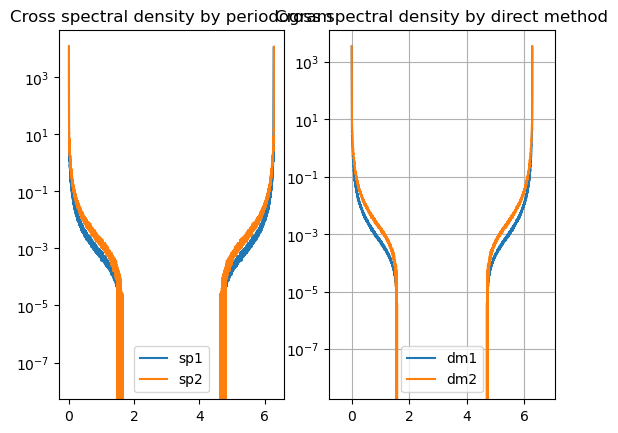

In [7]:
## Plot 1 crossspectra

z_crossspect_sigpred_num_fft_dm = h_wf_packs[2]
z_crossspect_sigpred_num_fft_sp = h_wf_packs[9]

nfft = Parms[1][3]


# fig, ax = sublots(1,2,sharey = true)

subplot(121);semilogy(2pi*(0:nfft-1)/nfft,(real(z_crossspect_sigpred_num_fft_sp[1,1,:])),label = "sp1"
            );semilogy(2pi*(0:nfft-1)/nfft,(real(z_crossspect_sigpred_num_fft_sp[1,2,:])),label = "sp2"
            );legend();title("Cross spectral density by periodogram")
subplot(122);semilogy(2pi*(0:nfft-1)/nfft,(real(z_crossspect_sigpred_num_fft_dm[1,1,:])),label = "dm1"
            );semilogy(2pi*(0:nfft-1)/nfft,(real(z_crossspect_sigpred_num_fft_dm[1,2,:])),label = "dm2"
            );legend();title("Cross spectral density by direct method")
axis(:equal)
grid("on")

In [ ]:
## Plot 2 crossspectra

S_sigpred_overS_plus_fft_num_dm = h_wf_packs[5]
S_sigpred_overS_plus_fft_num_sp = h_wf_packs[12]

nfft = Parms[1][3]

subplot(121);semilogy(2pi*(0:nfft-1)/nfft,(real(z_crossspect_sigpred_num_fft_sp[1,1,:])),label = "sp1"
            );semilogy(2pi*(0:nfft-1)/nfft,(real(z_crossspect_sigpred_num_fft_sp[1,2,:])),label = "sp2"
            );legend()
subplot(122);semilogy(2pi*(0:nfft-1)/nfft,(real(S_sigpred_overS_plus_fft_num_dm[1,1,:])),label = "dm1"
            );semilogy(2pi*(0:nfft-1)/nfft,(real(S_sigpred_overS_plus_fft_num_dm[1,2,:])),label = "dm2"
            );legend()